### Plot Geodata

If you wanna load new data from open street map you need to install the osmnx package. Otherwise the geopandas package suffices.


### To run the omsnx module in this notebook please do:


#### Use conda to build Python env with osmnx as main so that not upto date version in dependancies used but workable for osmnx

conda config --prepend channels conda-forge

conda create -n ox --strict-channel-priority osmnx

#### go into env
conda activate ox

#### install other libs that are needed for visulization
conda install matplotlib
conda install numpy
conda install -c anaconda ipykernel

#### makes conda env into a kernel which then can be used by jupyter notebook
python -m ipykernel install --user --name=ox

#### other Tool for queries to OpenStreetMap in testing phase
pip install OSMPythonTools


In [1]:
import osmnx as ox # not required for plotting only 
import glob
import os
os.chdir('../') # important if this notebook is not in main but in notebooks folder

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.cm as cm 

from gerda.core.virusPropagationModel import *
from shapely.geometry import Point

%matplotlib inline


In [2]:
mainModelCmap = cm.get_cmap('Set1')  # for our statuses and flags
statusAndFlagsColors = {
    'I': mainModelCmap(0),  # red
    'S': mainModelCmap(1),  # blue
    'R': mainModelCmap(2),  # green
    'D': 'black',

    'IsInfected': mainModelCmap(0),  # red
    'WasInfected': mainModelCmap(0),  # red
    'WasDiagnosed': mainModelCmap(4),  # blue
    'Diagnosed': mainModelCmap(4),  # orange
    'Hospitalized': mainModelCmap(6),  # brown
    'WasHospitalized': mainModelCmap(6),
    'WasICUed': mainModelCmap(7),
    'ICUed': mainModelCmap(7),  # pink
}


locationsCmap1 = cm.get_cmap('Dark2')  # for our locations
locationsCmap2 = cm.get_cmap('tab20')
locationTypeColors = {
    'home': locationsCmap1(0),  # aquamarine
    'public': locationsCmap1(2),  # purple-blue
    'work': locationsCmap1(3),  # deep pink
    'hospital': locationsCmap1(5),  # mustard yellow
    'school': locationsCmap2(17),  # olive green - khaki
    'morgue': locationsCmap1(7)  # gray
}

### Load simulation and simulate

In [4]:
#sim_name = 'no_mitigation_inf_0.5_0'
world_name = 'Gangelt_MA_1_1'

#Simulation = load_simulation_object(sim_name, folder='server_data/')
world = load_simulation_object(world_name, folder='models/worlds/')
#Simulation.simulate()


ModuleNotFoundError: No module named 'virusPropagationModel'

In [ ]:
world.plot_distribution_of_location_types()
ax = plt.gca()
ax.set_yscale('log')
ax.set_ylabel('Number of Locations')
#plt.savefig('distribution_of_location_types', dpi=600)

In [ ]:
world.initialize_infection(specific_people_ids=[i for i in range(5)])

world.plot_initial_distribution_of_ages_and_infected(age_groups_step=10, save_figure=True)


#fig = plt.gcf()
#ax.savefig('distribution_of_ages_and_infected.png', dpi=600)

In [ ]:
ax.set_yscale('log')

In [ ]:
df_loc_stat = Simulation.get_location_and_status()

In [ ]:
df_loc_stat[df_loc_stat['time']==1]

### map status 

In [ ]:
plt.text(max(buildings['building_coordinates_x']),max(buildings['building_coordinates_y']), 'H')
plt.text(min(buildings['building_coordinates_x']),min(buildings['building_coordinates_y']),'M')


In [ ]:
steps = Simulation.time_steps
#steps = 1
#stats= ['I','R','S','D']
stats= ['I']#,'R','S','D']

#cmap2 = cm.get_cmap('Set1')
#statusAndFlagsColors[stat]

for i,stat in enumerate(stats):
    for time in range(steps):
            #stat='I'
            loc_stat_t = df_loc_stat[df_loc_stat['time']==time]

            plt.figure(figsize=(15,7))
            ax = plt.subplot()
            #cmap = cm.get_cmap('Dark2')
            area.plot(ax=ax, color='k' ,alpha=0.01)
            streets.plot(ax=ax, color='k', alpha=0.1)
            buildings.plot(ax=ax, color='gray')#cmap='Dark2')

            ax.scatter(loc_stat_t['x_coordinate'],loc_stat_t['y_coordinate'], s = 20*loc_stat_t[stat], alpha=0.5, label=stat, color=statusAndFlagsColors[stat])
            plt.text(max(buildings['building_coordinates_x']),max(buildings['building_coordinates_y']), 'H')
            plt.text(min(buildings['building_coordinates_x']),min(buildings['building_coordinates_y']), 'M')
            #for k,stat in enumerate(['R','S','I','D']):
                #plt.subplot(2,2,k+1)
                #plt.title(stat)
                #plt.scatter(loc_stat_t['x_coordinate'],loc_stat_t['y_coordinate'], s = 20*loc_stat_t[stat], alpha=0.3, label=stat, color=cmap(k))
            #plt.suptitle('status at time '+str(time))
            plt.title(str(stat)+' in Gangelt at '+str(time)+' h')
            plt.tight_layout()
            #plt.legend()
            plt.savefig('plots/no_mitigation/loc_t_'+str(stat)+'_'+sim_name+'_'+str(time)+'.png')
            plt.close()

#for k,p in enumerate(list_of_neighbourhood_centers):
#    ax.scatter(p.x,p.y, color = cmap(k), s=400, alpha=0.5, label=k)
#ax.legend(title='neighbourhood', frameon=False)    


In [ ]:
Simulation.plot_status_timecourse()

plt.plot()

#### How to load geodata from Openstreetmap (takes long)

In [ ]:
# Specify the name that is used to seach for the data
#place_name = "Heinsberg, Nordrhein-Westfalen, Germany"
place_name = "Gangelt, Kreis Heinsberg, Nordrhein-Westfalen, Germany"

# Fetch OSM street network from the location, only once! takes forever  
graph = ox.graph_from_place(place_name)
area = ox.gdf_from_place(place_name)
buildings = ox.footprints_from_place(place_name)


#### Load our (reduced) dataset
(if not present in the datafiles folder pls run: python read_geodata.py -ma 1)

In [4]:
place_name_1 = "Heinsberg, Nordrhein-Westfalen, Germany"
place_name_2 = "Gangelt, Kreis Heinsberg, Nordrhein-Westfalen, Germany"
place_name_3 = "Penkridge, South Staffordshire, Staffordshire, West Midlands, England, ST19 5DJ, Vereinigtes Königreich"
place_name_4 = "Epping, Essex, East of England, England, CM16 4BD, Vereinigtes Königreich"
place_name_5 = "Stratford-upon-Avon, Warwickshire, West Midlands, England, CV37 6AH, Vereinigtes Königreich"
place_name_6 = "Charlottenlund"
place_name_7 = "Helsingör, Helsingør Municipality, Hauptstadtregion, 3000, Dänemark"
place_name_8 = "Bornholms Regionskommune, Hauptstadtregion, Dänemark"
place_name_9 = "Bad Feilnbach, Landkreis Rosenheim, Bayern, 83075, Germany"
#not working for me actually 8892, 7days incidence = 34.74 2.11.2020
place_name_10 = "Bockhorn, Landkreis Friesland, Niedersachsen, 26345, Germany"
#agents: 7399 actually 12431, 7days incidence = 46.7 3.11.2020 
place_name_11 = "Hessisch Lichtenau, Werra-Meißner-Kreis, Regierungsbezirk Kassel, Hessen, 37235, Germany"
#agents: 7447 actually 8242 , 7days incidence = 52.0 3.11.2020
place_name_12 = "Oranienbaum-Wörlitz, Wittenberg, Sachsen-Anhalt, 06785, Germany"
#agents: 9548 actually 9882, 7days incidence = 149.0 2.11.2020
place_name_13 = "Linsengericht, Main-Kinzig-Kreis, Hessen, 63589, Germany"
#agents: 9339 actually 9954, 7days incidence = 287.2 2.11.2020
place_name_14 = "Simbach a.Inn, Landkreis Rottal-Inn, Bayern, 84359, Germany"

# definied center of neihbourhoods - freely choosen 
list_of_n_1 = [Point(6.1,51.06),Point(6.075,51.05),Point(6.145,51.035),Point(6.07,51.10)] 
list_of_n_2 = [Point(5.99,51.03),Point(6.05,51.01),Point(6.04,50.98),Point(5.99,50.99)]
list_of_n_3 = [Point(-2.08,52.42)]
list_of_n_4 = [Point(0.06,51.41)]
list_of_n_5 = [Point(-1.70,52.19)]
list_of_n_6 = [Point(12.57,55.76)]
list_of_n_7 = [Point(12.60,56.03)]
list_of_n_8 = [Point(14.88,55.11)]
list_of_n_9 = [Point(47.7728352, 12.0062484),Point(47.7973373, 11.9747759),Point( 47.7610224, 12.0510184)]
list_of_n_10 = [Point(8.0172, 53.39422),Point(7.99973, 53.3675)]
list_of_n_11 = [Point(9.70088,51.22621),Point(9.69110,51.21141),Point(9.72293,51.19661),Point(9.76303,51.17931),Point(9.79662,51.21392),Point(9.82794,51.20514),Point(9.64599,51.19812)]
list_of_n_12 = [Point(12.42153,51.84190),Point(12.40572,51.79565),Point(12.34469,51.80463),Point(12.35341,51.84544)]
list_of_n_13 = [Point(9.17492,50.16440),Point(9.18954,50.15995),Point(9.21508,50.17192),Point(9.23338,50.18020),Point(9.19677,50.18895),Point(9.19646,50.14921)]
list_of_n_14 = [Point(13.00774,48.273556),Point(13.008913,48.260859),Point(13.020287,48.2657),Point(13.031493,48.27723),Point(13.04637,48.275227)]

places = {1: [place_name_1,list_of_n_1],
          2: [place_name_2,list_of_n_2],
          3: [place_name_3,list_of_n_3],
          4: [place_name_4,list_of_n_4],
          5: [place_name_5,list_of_n_5],
          6: [place_name_6,list_of_n_6],
          7: [place_name_7,list_of_n_7],
          8: [place_name_8,list_of_n_8],
          9: [place_name_9,list_of_n_9],
          10: [place_name_10,list_of_n_10],
          11: [place_name_11,list_of_n_11],
          12: [place_name_12,list_of_n_12],
          13: [place_name_13,list_of_n_13],
          14: [place_name_14,list_of_n_14]
         }

In [14]:
pick = 13

In [15]:
name = places[pick][0].split(',')[0]
name

'Linsengericht'

In [25]:
min_area = 0.5 # [1,3] 
helper = str(min_area)
helper = helper.replace('.','_')

area = gpd.read_file('datafiles/Area_'+ name +'_MA_' + helper + '.geojson')
buildings = gpd.read_file('datafiles/Buildings_'+ name +'_MA_' + helper + '.geojson')
streets = gpd.read_file('datafiles/Streets_'+ name +'_MA_' + helper + '.geojson')

#### center of neihbourhood is choosen manually 

In [18]:
list_of_neighbourhood_centers = places[pick][1]

#### plot location

Text(0.5, 1.0, "<module 'time' (built-in)> time ")

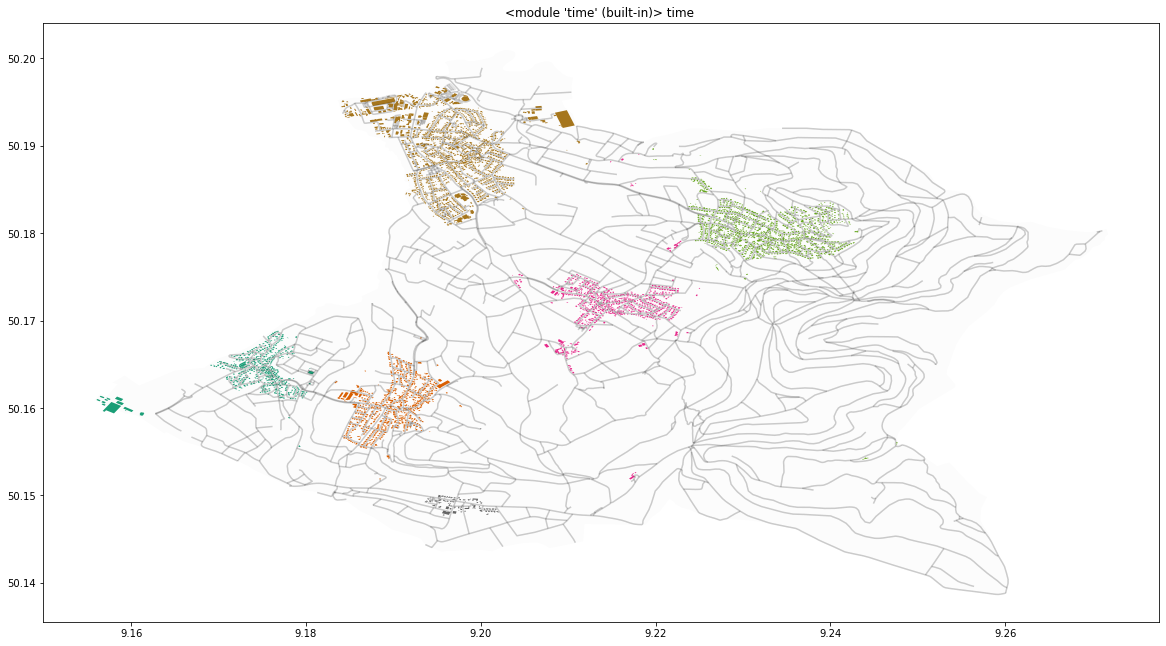

In [19]:
#r1 = gpd.read_file('datafiles/Buildings_Heinsberg.geojson')
import matplotlib.cm as cm 

fig, ax = plt.subplots(figsize=(20,15))
ax = plt.subplot()
cmap = cm.get_cmap('Dark2')

area.plot(ax=ax, color='k' ,alpha=0.01)
streets.plot(ax=ax, color='k', alpha=0.1)
buildings.plot(ax=ax, column='neighbourhood', cmap='Dark2')

#for k,p in enumerate(list_of_neighbourhood_centers):
#    ax.scatter(p.x,p.y, color = cmap(k), s=400, alpha=0.5, label=k)
#ax.legend(title='neighbourhood', frameon=False)    
plt.title(str(time)+' time ')


### zoomed to neighbourhood 

In [ ]:
plotrange=0.03
neighbourhood = 0

fig, ax = plt.subplots(figsize=(20,15))
ax = plt.subplot()
cmap = cm.get_cmap('Dark2')

area.plot(ax=ax, color='k' ,alpha=0.01)
streets.plot(ax=ax, color='k', alpha=0.1)
buildings.plot(ax=ax, column='neighbourhood', cmap='Dark2')

for k,p in enumerate(list_of_neighbourhood_centers):
    ax.scatter(p.x,p.y, color = cmap(k), s=400, alpha=0.5, label=k)
ax.legend(title='neighbourhood', frameon=False)    
plt.title('Gangelt')
ax.set_xlim(list_of_neighbourhood_centers[neighbourhood].x-plotrange,list_of_neighbourhood_centers[neighbourhood].x+plotrange)
ax.set_ylim(list_of_neighbourhood_centers[neighbourhood].y-plotrange,list_of_neighbourhood_centers[neighbourhood].y+plotrange)

#### plot infection status

#### plot location type

### list of 'amenities'

In [ ]:
print(buildings['amenity'].unique())

### List of all relevant columns and their unique values for building type assignment

In [ ]:
col_names=['building','amenity','shop','leisure', 'sport', 'office','healthcare']
list_cols=[]
for x in col_names:
    print(x)
    try:
        print(buildings[x].dropna().unique())
        list_cols.append(x)
    except:
        print('column not in DataFrame')
    print('\n')


In [ ]:
buildings['neighbourhood'].unique()

### Same building classification functions as in the project

In [26]:


def assign_location_classifier(df_buildings):
        '''Build reference lists for assign_building_type() from given dataframe.
        Should be produced by read_geodata.py.
        Possible classes and therefore dictionary keys are:
        'excluded_buildings' = buildings not included because they do not fit any class
        'hospital' = hospitals
        'work' = anything a person can work at
        'public' = right now religous and sport buildings #FIXME-Discussion: restaurantes, bars, cafe?
        'school' = places with a lot of young people
        Sorting idea as of right now everything is work place if not in any other list
        : return: location class dictionary loc_class_dic['school'] = ['school','university','kindergarten']

        '''
        loc_class_dic = {}

        loc_class_dic['excluded_buildings'] = ['detached', 'garage', 'roof', 'shed', 'bungalow', 'barn', 'silo']
        loc_class_dic['hospital'] = ['hospital']
        loc_class_dic['morgue'] = ['morgue','funeral_hall']
        loc_class_dic['mixing_loc'] = ['mixing_loc']
        
        
        cols = ['amenity', 'shop', 'leisure', 'sport','building']
        for col in cols:
            try:
                list(df_buildings[col].unique())
            except:
                df_buildings[col] = [np.nan]*len(df_buildings)


        loc_class_dic['work'] = ['civic', 'commercial', 'company', 'construction', 'cowshed', 'farm', 'farm_auxiliary', 'fire_station', 'greenhouse', 'industrial',\
                                 'manufacture', 'office', 'retail', 'service', 'shed', 'stable', 'transformer_tower', 'warehouse']\
            + list(df_buildings['amenity'].unique())\

        # What is a public place or just work place e.g. restaurante, cafe...

        loc_class_dic['public'] = ['bank', 'cabin', 'cafe', 'car_wash', 'chapel', 'church', 'doctors', 'fast_food', 'grocery_store', 'hotel',\
                                   'hut', 'parish_hall', 'place_of_worship', 'police', 'pub', 'public', 'restaurant', 'ruins', 'service', 'shelter',\
                                   'social_facility', 'sports_centre', 'sports_hall', 'supermarket', 'temple', 'toilets', 'townhall', 'train_station']\
            + list(df_buildings['leisure'].unique())\
            + list(df_buildings['sport'].unique())\
            + list(df_buildings['shop'].unique())

        loc_class_dic['school'] = ['school', 'university', 'kindergarten']
        # Cleaning the list public place of nan
        loc_class_dic['public'] = [x for x in loc_class_dic['public'] if ~pd.isnull(x)]
        # Removing values from workplace_list that are in work place and in another list
        for x in loc_class_dic['hospital'] + [np.nan] + loc_class_dic['public'] + loc_class_dic['school']:
            while x in loc_class_dic['work']:
                loc_class_dic['work'].remove(x)

        return loc_class_dic

def assign_building_type(building_lst: list, loc_class_dic: dict):
    '''set building type according to value in building_lst and where it matches with reference lists

        : return: string with building type
    '''
    # auto assign is home
    building_type = 'home'
    # if any entry of building_lst matches any location class entry: it is assigned to that class
    for key in loc_class_dic:
        if any(elem in loc_class_dic[key] for elem in building_lst):
            building_type = key

    return building_type

### Classification process

In [27]:
buildings

,building,amenity,shop,leisure,sport,building:levels,name,building_coordinates_x,building_coordinates_y,building_area,neighbourhood,geometry
0,yes,None,None,sports_centre,multi,None,TV Lützelhausen,9.180567,50.164057,1.589273e-07,0,"POLYGON ((9.18091 50.16410, 9.18088 50.16405, ..."
1,supermarket,None,None,None,None,None,None,9.196943,50.195777,1.743511e-07,4,"POLYGON ((9.19661 50.19563, 9.19665 50.19567, ..."
2,supermarket,None,None,None,None,None,None,9.196172,50.195237,2.026469e-07,4,"POLYGON ((9.19622 50.19545, 9.19625 50.19543, ..."
3,office,bank,None,None,None,None,VR-Bank,9.195866,50.196342,2.011841e-07,4,"POLYGON ((9.19598 50.19643, 9.19593 50.19645, ..."
4,yes,None,None,sports_centre,tennis,None,Sporttreff Kinzigtal,9.193688,50.193517,3.166653e-07,4,"POLYGON ((9.19352 50.19384, 9.19333 50.19327, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
4665,yes,None,None,None,None,None,None,9.186646,50.155473,1.199976e-08,1,"POLYGON ((9.18664 50.15555, 9.18657 50.15542, ..."
4666,yes,None,None,None,None,None,None,9.188244,50.159083,8.957875e-09,1,"POLYGON ((9.18818 50.15913, 9.18832 50.15908, ..."
4667,yes,None,None,None,None,None,None,9.188260,50.159134,9.523335e-09,1,"POLYGON ((9.18832 50.15908, 9.18818 50.15913, ..."
4668,yes,None,None,None,None,None,None,9.192549,50.163880,1.522421e-08,1,"POLYGON ((9.19247 50.16382, 9.19260 50.16381, ..."


In [32]:
buildings = gpd.read_file('datafiles/Buildings_'+ name + '_MA_'+ helper +'.geojson')
loc_class_dic = assign_location_classifier(buildings)
#Columns important to classify building type and therefore which location type it is and list_cols made because else pandas complains
col_names = ['building','amenity','shop','leisure', 'sport','healthcare']
list_cols=[]
for x in col_names:
    print(x)
    try:
        print(buildings[x].dropna().unique())
        list_cols.append(x)
    except:
        print('column not in DataFrame')
    print('\n')
#start of boolcheck to see if at least one hospital in dataframe
buildings['building_type']= buildings.apply(lambda row: assign_building_type(row[list_cols].dropna().unique(), loc_class_dic), axis = 1)

building
['yes' 'supermarket' 'office' 'church' 'roof' 'public' 'warehouse'
 'retail' 'commercial' 'house' 'barn' 'industrial' 'residential' 'garage'
 'terrace' 'school' 'garages' 'service' 'construction' 'silo']


amenity
['bank' 'school' 'place_of_worship' 'townhall' 'public_building'
 'kindergarten' 'restaurant' 'doctors' 'veterinary' 'car_wash'
 'fire_station' 'pub']


shop
['supermarket' 'beverages' 'car' 'signs' 'laundry' 'shoes' 'butcher'
 'frame' 'florist']


leisure
['sports_centre' 'pitch']


sport
['multi' 'tennis' 'soccer' 'shooting']


healthcare
column not in DataFrame




### Plot coloring the buildings by classification

/home/maxim/anaconda3/envs/ox/lib/python3.8/site-packages/geopandas/plotting.py:529: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/home/maxim/anaconda3/envs/ox/lib/python3.8/site-packages/geopandas/plotting.py:529: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
No handles with labels found to put in legend.


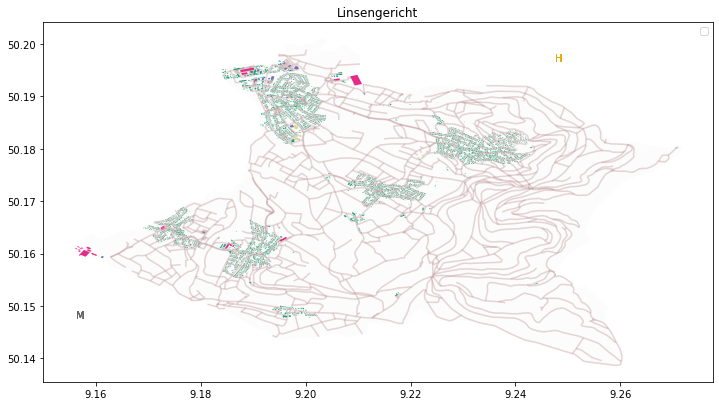

In [34]:
plotrange=0.02
neighbourhood = 3
print()
import matplotlib.cm as cm 

fig, ax = plt.subplots(figsize=(12,9))
ax = plt.subplot()
cmap = cm.get_cmap('Dark2')

area.plot(ax=ax, color='black' ,alpha=0.01)
streets.plot(ax=ax, color='#BC8F8F', alpha=0.2)

for building_type in locationTypeColors:
    buildings[buildings['building_type']==building_type].plot(ax=ax, color=locationTypeColors[building_type], label=building_type, legend=False,legend_kwds={'frameon':False, 'loc':'lower right'})
    ax.text(max(buildings['building_coordinates_x']),max(buildings['building_coordinates_y']), 'H', c=locationsCmap1(5))
    ax.text(min(buildings['building_coordinates_x']),min(buildings['building_coordinates_y']), 'M', c=locationsCmap1(7))
    ax.set_label('s')
    #handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles=[building_type], loc='lower right')
plt.legend()
plt.title(name)
plt.savefig(name + '_location_type_map.png', dpi=600)
#plt.legend()    
#ax.set_xlim(list_of_neighbourhood_centers[neighbourhood].x-plotrange,list_of_neighbourhood_centers[neighbourhood].x+plotrange)
#ax.set_ylim(list_of_neighbourhood_centers[neighbourhood].y-plotrange,list_of_neighbourhood_centers[neighbourhood].y+plotrange)

In [ ]:
ax.get_legend_handles_labels()
ax.set_label()

In [ ]:
#### number of locations

In [ ]:
len(buildings)

### voronoi prob

not implemented idea to assign neighbourhoods 

In [ ]:
from scipy.spatial import Voronoi, voronoi_plot_2d
points = np.random.random((10, 2))

points =np.array([[6.080,51.03],
                   [6.175,51.02],
                   [6.075,51.08],
                   [6.125,51.07]])
vor = Voronoi(points)
voronoi_plot_2d(vor)
vor.points

v=vor.close()

Link for amenities:
https://wiki.openstreetmap.org/wiki/Key:amenity#Healthcare

In [ ]:
buildings_of_interest = ['clinic',
                         'doctors',
                         'nursing_home',
                         'pharmacy',
                         'social_facility',
                         'hospital',
                         'school',
                         'kindergarten',
                         'university',
                         'library',
                         'marketplace']
#get all the interesting amenity in the place of interest. !!BEWARE!! not all buildings have amenity so supermarket is separate query
bois = ox.pois_from_place(place_name, amenities=buildings_of_interest)

In [ ]:
#extra just for hospitals for nicer visulisation
#boish = ox.pois_from_place(place_name, amenities=['hospital'])
#boisr = ox.pois_from_place(place_name, shop=)

In [ ]:
#idea check to see if ox.pois_from_place(place_name, amenities=buildings_of_interest) and ox.footprints_from_place(place_name) 
#do the same not finished but they are not, for Wedding!
bos = buildings[buildings['amenity'].isin(buildings_of_interest)]
bos

In [ ]:
#start of different idea to access OpenStreetMap and retrive data
#aĺlows to make own queries with more variables than ameniety so longterm better solution
from OSMPythonTools.nominatim import Nominatim
#get area data by area name. very convenient
nominatim = Nominatim()
#get area data here id by area name
areaId = nominatim.query('Berlin, Germany').areaId()
areaId

In [ ]:
#here the query for the buildings will happen
from OSMPythonTools.overpass import overpassQueryBuilder, Overpass
buildings_of_interest = ['clinic',
                         'doctors',
                         'nursing_home',
                         'pharmacy',
                         'social_facility',
                         'hospital',
                         'school',
                         'kindergarten',
                         'university',
                         'library',
                         'marketplace']
#overpass is the nicest api to use, at least there were examples for this tool
overpass = Overpass()
#query to api, saddly right now only one selector possible but idea is to loop or find help
query = overpassQueryBuilder(area=areaId, elementType=['node','way', 'relation'], selector='"amenity"="hospital"', includeGeometry=True)
#saves data as some kind of formated list
result = overpass.query(query)
result

In [ ]:
import geopandas as gpd
#in result.elements list of the actual things. to my understanding in GeoJson format hope is that geopanda can use them
result.elements()[1]